## Group 21 Project Proposal -- Car Purchase Amount For Different Genders

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(digest)
library(testthat)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




# Introduction

Understanding consumer behaviour and the various factors that influence decision making by consumers forms an integral part of understanding how the market works, the impact on the state of demand and supply, and eventually the functioning of the economy. Therefore, it is vital to study the various aspects of consumers' identities to determine which aspects do in fact influence the decisions they make with regards to consumption, and if a definitive relationship between certain characteristics and purchasing decisions exists. 

As mentioned in Boston Globe, men tend to shop longer and spend more than women in car stores (Boston Globe, 2012). The CarGurus study, which examined gender differences in car-shopping behavior, found the average price of the cars for which male shoppers submitted purchase inquiries was 13% higher than for female shoppers (Corkran, C., & Writer, C, 2012).

In our case, that is exactly what we are setting out to do. We are looking at a market centered around car sales and the amount a consumer is likely to spend on cars given certain characteristics. Our specific question is to determine whether there is a significant difference in the mean car purchase amount of males and females. 

Our dataset looks at customers from different countries with at least one male and one female picked from each country (although the overall count for males is more than it is for females). We provide more details on the precise counts later on. The sample size of the data is 500 which means 500 customers have been surveyed across countries (in the dataset, due to repition of some names i.e. specifically the name Seth, the country variable is a good differentiator). 




#### Hence, the question we are seeking to answer is as follows:
#### Is there a significant difference in the mean car purchase amount of two genders (namely, males and females)?

# Methods and Results

### Preliminary Results

#### The first step in our process is to read the data from the web (i.e. for us, the wesbite Kaggle).

In [2]:
url <- "https://raw.githubusercontent.com/SugarLucas/group21/main/car_purchasing.csv"

#### Next, we import our data in the form of a data frame, in order to continue our data analysis. 

In [3]:
car <- read_csv(url)

Rows: 500 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): customer name, customer e-mail, country
dbl (6): gender, age, annual Salary, credit card debt, net worth, car purcha...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#replace the blank spaces in the variable names
names(car)<-str_replace_all(names(car), c(" " = "." , "," = "", "-" = "_"))

### Now, we need to display our data frame. 

In [5]:
head(car)

customer.name,customer.e_mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,car.purchase.amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Table 1: First 6 rows of raw data set

The columns in the dataset are:
1. customer.name: Customer's name
2. customer.e_mail: Customer's email
3. country: Customer's country
4. gender: Customer's gender
5. age: Customer's age
6. annual.Salary: Customer's annual salary (dollars)
7. credit.card.debt: Customer's credit card debt (dollars)
8. net worth: Customer's net worth
9. car.purchase.amount: overall amount that consumers would spend to purchase car (dollars)

The population is people from all over the world.

#### Now that we can view the data, we proceed to filter the meaningful columns which can be analyzed.

In [6]:
car_relevant <- select(car, -customer.name, -customer.e_mail)
head(car_relevant)

country,gender,age,annual.Salary,credit.card.debt,net.worth,car.purchase.amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Table 2: First six rows of analyzable columns

In [7]:
#get a brief summary of the dataset
summary(car_relevant)

   country              gender           age        annual.Salary   
 Length:500         Min.   :0.000   Min.   :20.00   Min.   : 20000  
 Class :character   1st Qu.:0.000   1st Qu.:40.95   1st Qu.: 54392  
 Mode  :character   Median :1.000   Median :46.05   Median : 62916  
                    Mean   :0.506   Mean   :46.24   Mean   : 62127  
                    3rd Qu.:1.000   3rd Qu.:51.61   3rd Qu.: 70118  
                    Max.   :1.000   Max.   :70.00   Max.   :100000  
 credit.card.debt   net.worth       car.purchase.amount
 Min.   :  100    Min.   :  20000   Min.   : 9000      
 1st Qu.: 7398    1st Qu.: 299824   1st Qu.:37630      
 Median : 9655    Median : 426750   Median :43998      
 Mean   : 9608    Mean   : 431476   Mean   :44210      
 3rd Qu.:11799    3rd Qu.: 557324   3rd Qu.:51255      
 Max.   :20000    Max.   :1000000   Max.   :80000      

Table 3: Summary of data set

In [8]:
nrow(car_relevant)

[1] 500

There are 500 rows, that is, our overall sample size is 500.

#### Filter relevant columns

In [9]:
gender_data <- car_relevant %>%
                mutate(gender = as.factor(gender)) %>%
                select(gender, car.purchase.amount) %>%
                na.omit() %>%
                mutate(gender = recode(gender, `0`= "Female", `1`= "Male"))

In [10]:
head(gender_data)

gender,car.purchase.amount
<fct>,<dbl>
Female,35321.46
Female,45115.53
Male,42925.71
Male,67422.36
Male,55915.46
Male,56612.00


Table 4: Relevant data

#### Point estimates of mean, median, and standard deviation for each group

In [11]:
gender_data_summary <- gender_data %>% 
    group_by(gender) %>% 
    summarize(Mean_amount = mean(car.purchase.amount),
              Median_amount = median(car.purchase.amount),
              SD_amount = sd(car.purchase.amount),
              Num_Observations = n())

gender_data_summary

gender,Mean_amount,Median_amount,SD_amount,Num_Observations
<fct>,<dbl>,<dbl>,<dbl>,<int>
Female,44933.13,44463.31,10325.99,247
Male,43503.62,42909.27,11167.77,253


Table 5: Summary table of relevant data

Here we know that sample size for females is 247 and that for males is 253. This tells us that the sample sizes of males and females are roughly the same.

Since the sample mean of car purchase amount for females is 44933.13 and the sample mean of car purchase amount for males is 43503.62, which are close but not the same, we are interested in investigating whether there is relationship between gender and mean car purchase amount. 

Since the standard deviations are small compared to the means (for the male and female populations), and the median and mean amounts are very close, we can use the difference between the means as our population parameter. 

# We use a histogram to get a brief view of the relationship between gender and car purchase amount.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



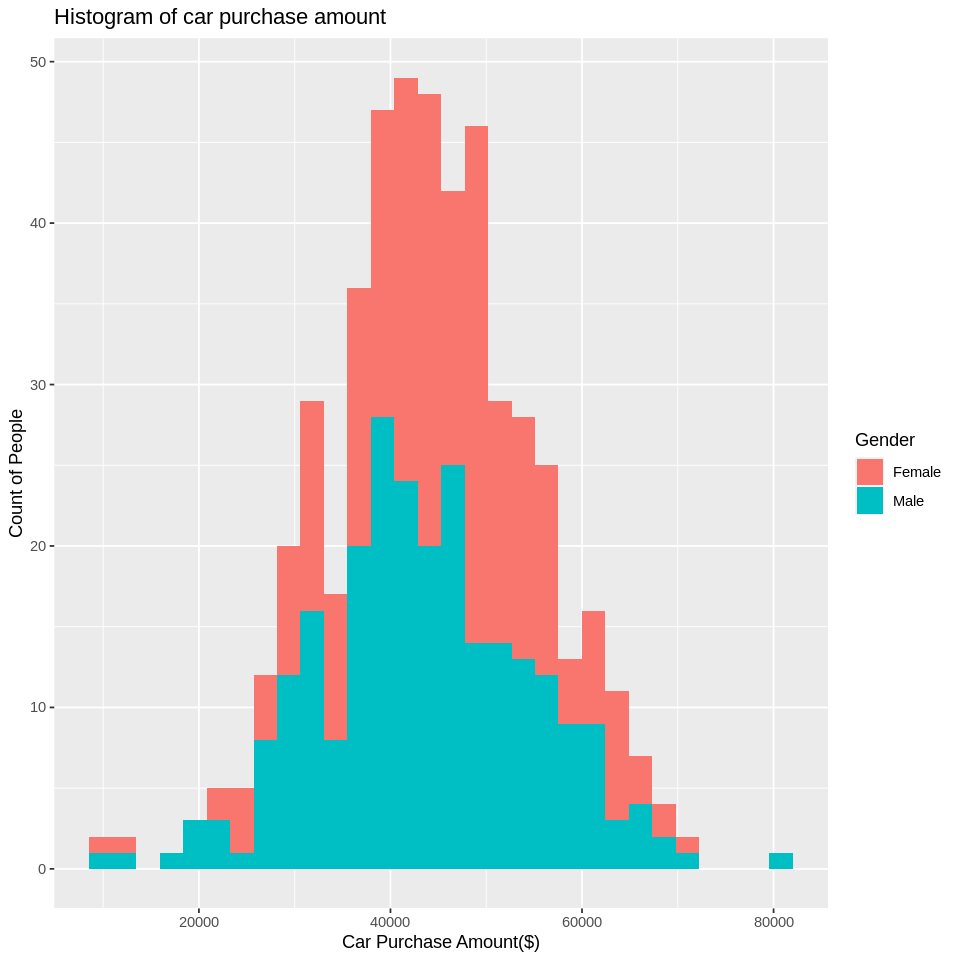

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8)

#histogram of amount of two genders
genderplot <- gender_data %>%
ggplot(aes(x = car.purchase.amount,fill = gender)) + 
geom_histogram() + 
ggtitle("Histogram of car purchase amount") +
labs(x = "Car Purchase Amount($)", y = "Count of People", fill = "Gender")

genderplot

Figure 1: Histogram of relationship between gender and car purchase amount

From the bar plot above, we know that both of two genders have the same bell shape distribution, which means they are normally distributed. We can also infer this by the fact that the median and mean amounts for both genders are very close. 

### Now we proceed to plot the distributions for both populations (referring to males and females from this point forward).

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8)

# histogram of male
male_plot <- gender_data %>%
                filter(gender == "Male") %>%   # filter for male's data
                ggplot() +
                geom_histogram(aes(x = car.purchase.amount),color = "white", bins = 15) +
                scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +   
                labs(x = "Car purchase amount", y = "Count of People") +
                ggtitle("Distribution of \nMale Car Purchase Amount")


# histogram of female
female_plot <- gender_data %>%
                filter(gender == "Female") %>%  # filter for female's data
                ggplot() +
                geom_histogram(aes(x = car.purchase.amount),color = "white", bins = 15) +
                scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +
                labs(x = "Car purchase amount", y = "Count of People") +
                ggtitle("Distribution of \nFemale Car Purchase Amount")

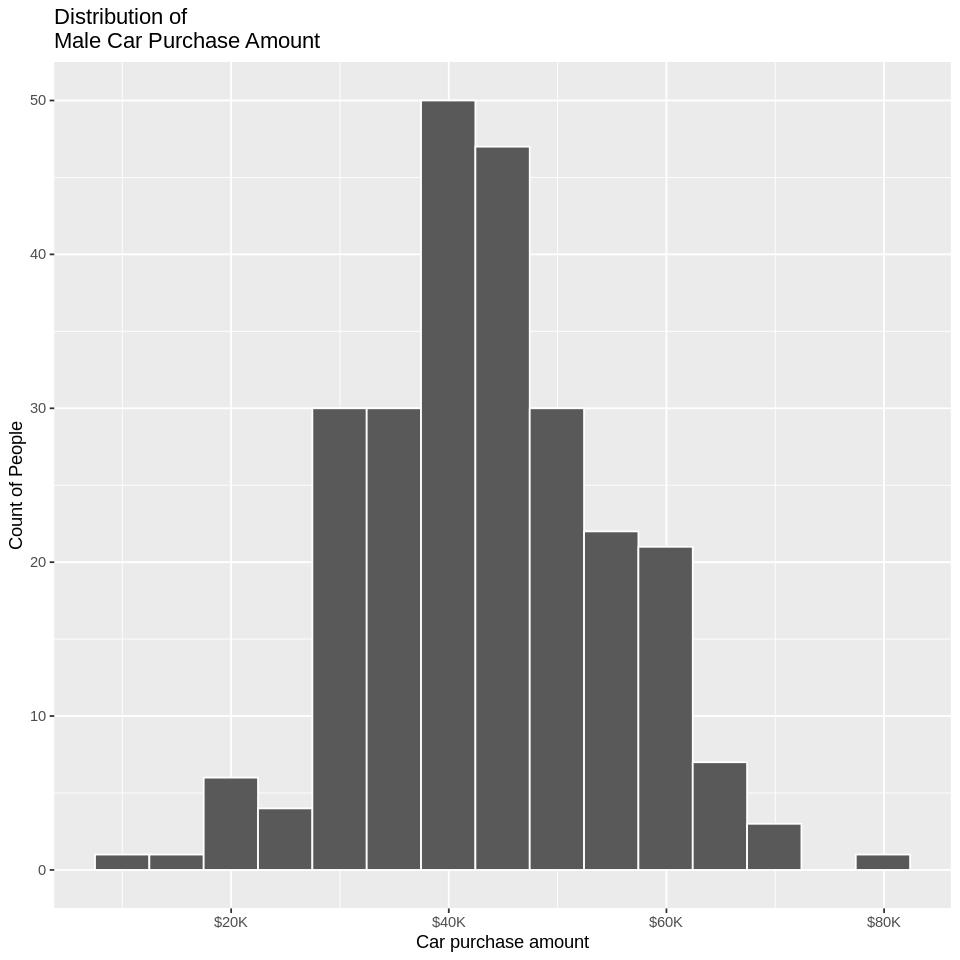

In [14]:
male_plot

Figure 2: Histogram for car purchase amount for males

From the graph, we can see that the distribution of car purchase amounts for males is a unimodal, mostly symmetric distribution.

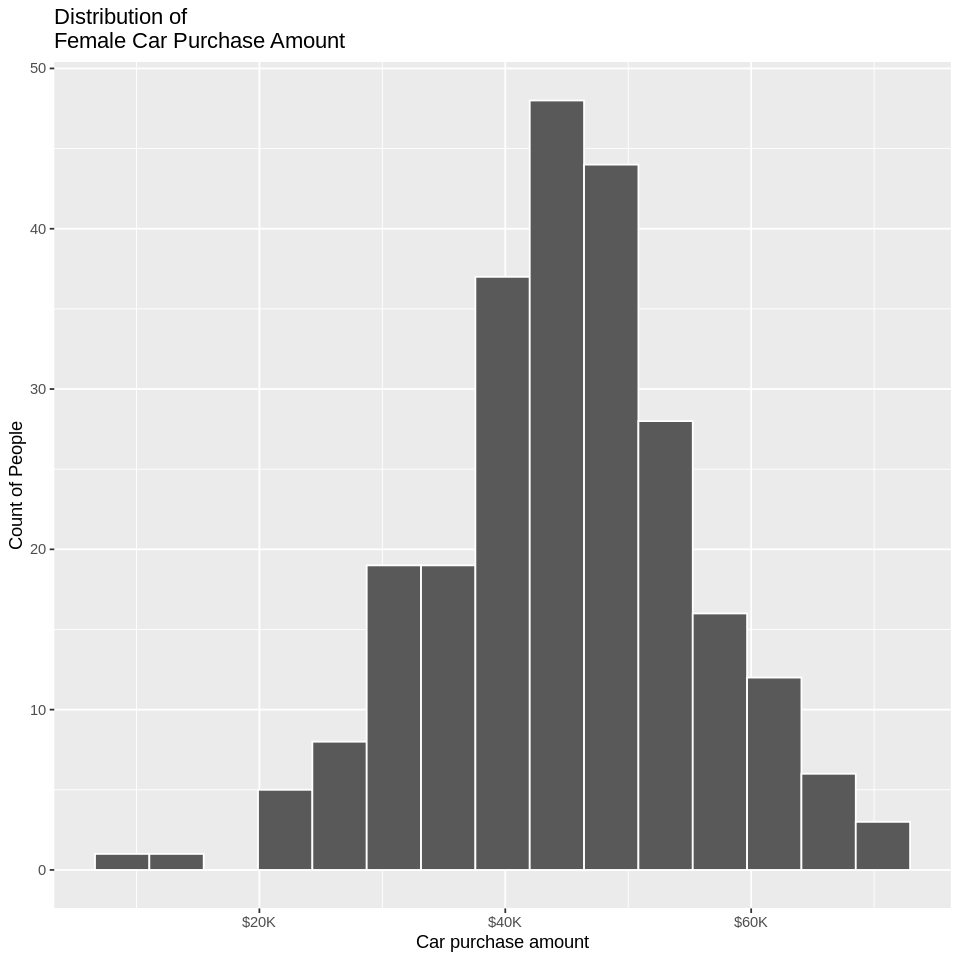

In [15]:
female_plot

Figure 3: Histogram for car purchase amount for females

From the graph, we can see that the distribution of car purchase amounts for females is a unimodal, mostly symmetric distribution.

#### Boxplot to compare these two genders

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


$fill
[1] "none"

attr(,"class")
[1] "guides"

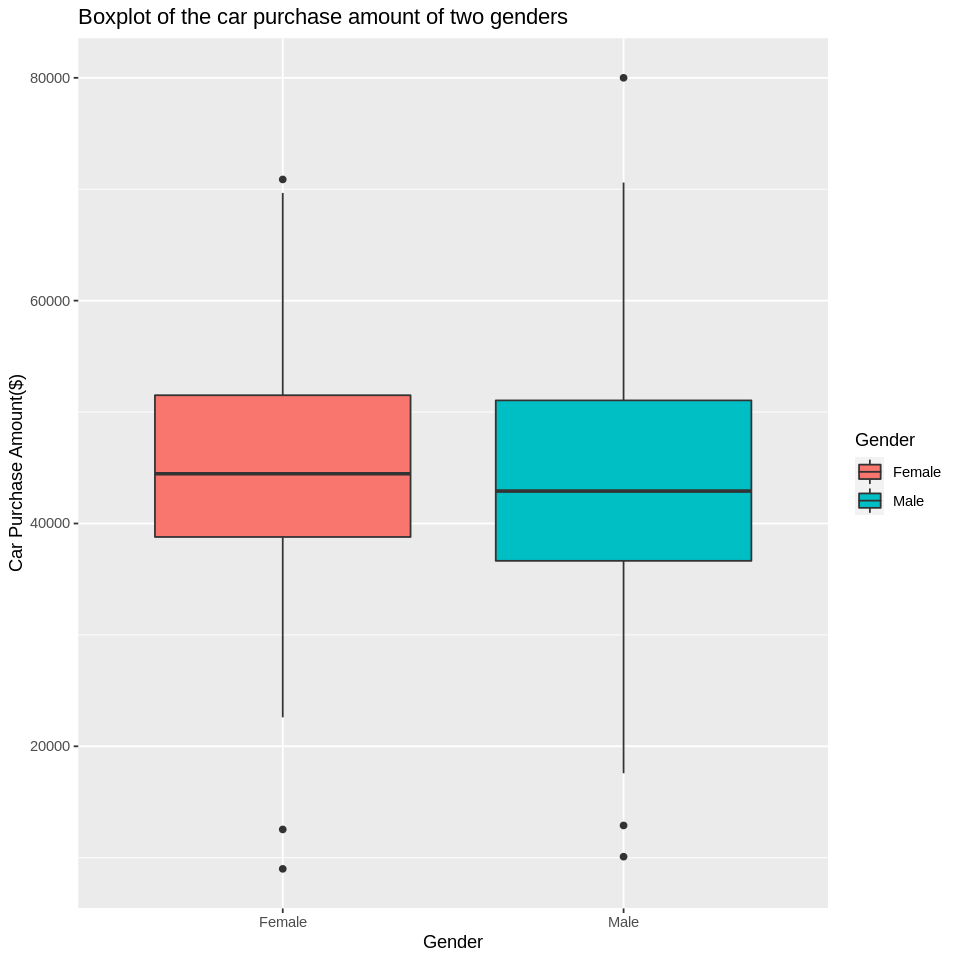

In [16]:
gender_boxplots <-
    gender_data %>%
    ggplot() +
    geom_boxplot(aes(gender, car.purchase.amount, fill = gender)) +
    ggtitle("Boxplot of the car purchase amount of two genders") + 
    labs(x = "Gender", y = "Car Purchase Amount($)", fill = "Gender")
    guides(fill = FALSE)

gender_boxplots

Figure 4: Boxplot of car purchase amount of the two genders

From the boxplot above, we know that there is an large overlapping between these two genders. 

## Method

### 1. Asymptotics method
### We will use hypothesis testing then.
#### Null hypothesis: the means of car purchase amount are the same for males and females.
#### Alternative hypothesis: the means of car purchase amount are not the same for males and females.

Remember the question we were trying to answer from the beginning: _Is there a significant difference in the mean car purchase amount of two genders?_

To answer this question, we will test the following hypotheses:
$$H_0: \mu_{\text{Female}} - \mu_{\text{Male}} = 0$$ $$H_1: \mu_{\text{Female}} - \mu_{\text{Male}} \neq 0$$
using the following test statistic:
$$
T = \frac{\bar{x}_{\text{Female}} - \bar{x}_{\text{Male}}}{\sqrt{\frac{s^2_{\text{Female}}}{n_1}+\frac{s^2_{\text{Male}}}{n_2}}}
$$
where $\bar{x}_{\text{Female}}$ and $\bar{x}_{\text{Male}}$ are the sample means of car purchase amount for females and males, respectively; $s^2_{\text{Female}}$ and $s^2_{\text{Male}}$ are the sample variances for the females and males, respectively; and $n_1$ and $n_2$ are the sample size for females and males, respectively. 

In [17]:
# Calculate test statistic
T <- 
  (gender_data_summary$Mean_amount[1] - gender_data_summary$Mean_amount[2]) / 
       sqrt((gender_data_summary$SD_amount[1])^2 / gender_data_summary$Num_Observations[1] 
            + (gender_data_summary$SD_amount[2])^2 / gender_data_summary$Num_Observations[2])
T

[1] 1.48662

In [18]:
fe <- gender_data |>
    filter(gender == "Female")

ma <- gender_data |>
    filter(gender == "Male")


analysis <- 
    tidy(
        t.test(x = fe$car.purchase.amount,
               y = ma$car.purchase.amount,
               alternative = "two.sided",
               conf.level = 0.95))

analysis

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1429.511,44933.13,43503.62,1.48662,0.1377499,496.54,-459.7655,3318.788,Welch Two Sample t-test,two.sided


Table 6: Summary of t-test

#### _Conclusion: Since the p-value, 0.1377, is larger than 0.05 (significance level), we fail to reject null hypothesis. The test is insignificant at the given 5% significance level. We conclude that there is not a significant difference in the mean car purchase amount of two genders._
#### _Our confidence interval is [-459.7655, 3318.788]. Therefore, we are 95% confident that the interval [-459.7655, 3318.788] contains the difference in means of car purchase amount of females and males._

### 2. Bootstrapping method

In [19]:
#Calculate the observed sample mean difference of the two genders.
sample_mean_diff <- gender_data_summary %>%
                    select(gender, Mean_amount)%>%
                    pivot_wider(names_from = gender , values_from = Mean_amount)%>%
                    transmute(diff = Female - Male)%>%
                    pull(diff)
sample_mean_diff

[1] 1429.511

In [20]:
#Randomization for hypothesis test
set.seed(1000)

null_model_amount <- gender_data %>%
    specify(formula = car.purchase.amount ~ gender)%>%
    hypothesize(null="independence")%>%
    generate(reps=1000, type = "permute")%>%
    calculate(stat="diff in means",order=c("Female","Male"))
head(null_model_amount)

replicate,stat
<int>,<dbl>
1,1175.5072
2,458.4279
3,697.3330
4,-761.5269
5,-1664.3072
6,-565.1554


Table 7: Randomization/Permutation testing

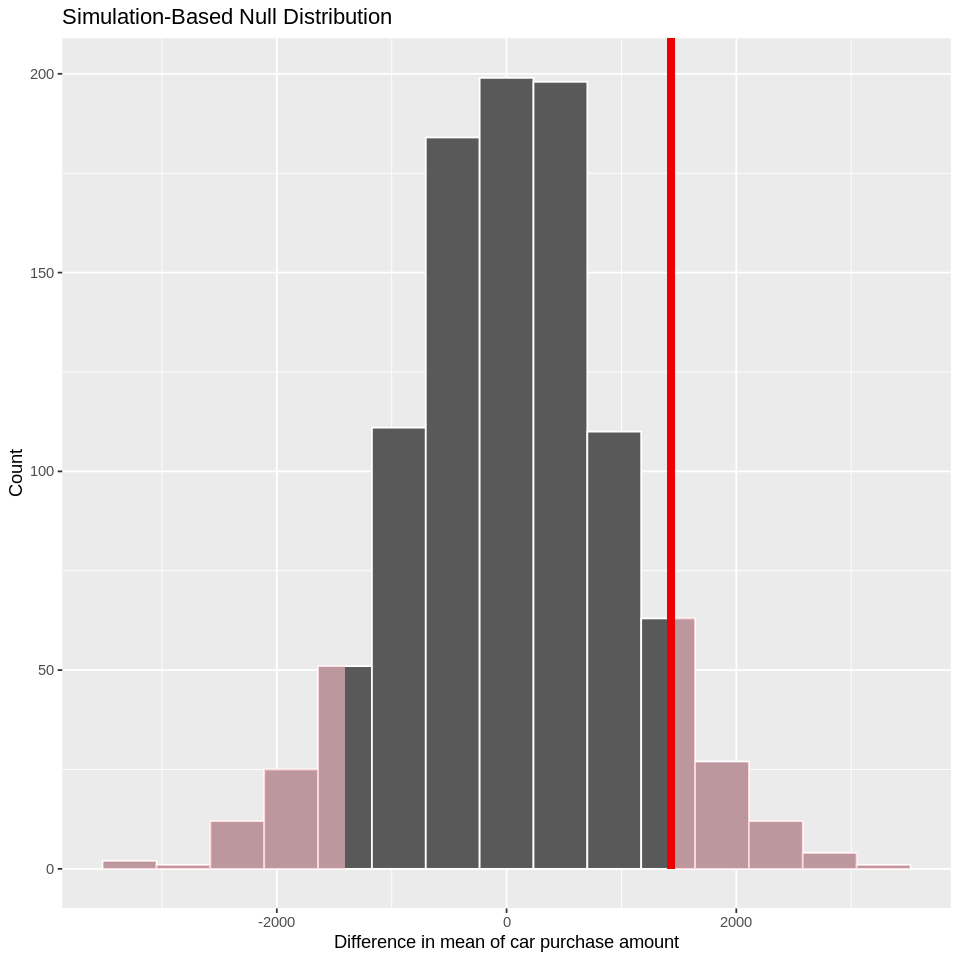

In [21]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Visualize the simulated population with shaded p-value
simulated_plot <- null_model_amount %>%
                    visualize() + 
                    shade_p_value(obs_stat = sample_mean_diff, direction = "both")+
                    xlab("Difference in mean of car purchase amount") + 
                    ylab("Count")
simulated_plot

Figure 5: Simulation-Based Null Distribution

##### Calculate p-value

In [22]:
# calculate the p_value
p_val <- null_model_amount %>%
 get_p_value(obs_stat = sample_mean_diff, direction = "both")

p_val

p_value
<dbl>
0.118


Table 8: p-value

Here we know our p-value is 0.118.

#### Use bootstrapping to get confidence interval

In [23]:
set.seed(1000)

bootstrap_distribution <- gender_data %>%
                specify(formula = car.purchase.amount ~ gender) %>% 
                generate(reps = 1000, type = "bootstrap") %>% 
                calculate(stat="diff in means", order = c("Female", "Male"))
                          
conf_int <- bootstrap_distribution %>%
        get_confidence_interval(type = 'percentile', level = 0.95)
conf_int

lower_ci,upper_ci
<dbl>,<dbl>
-514.8587,3333.005


Table 9: Confidence interval

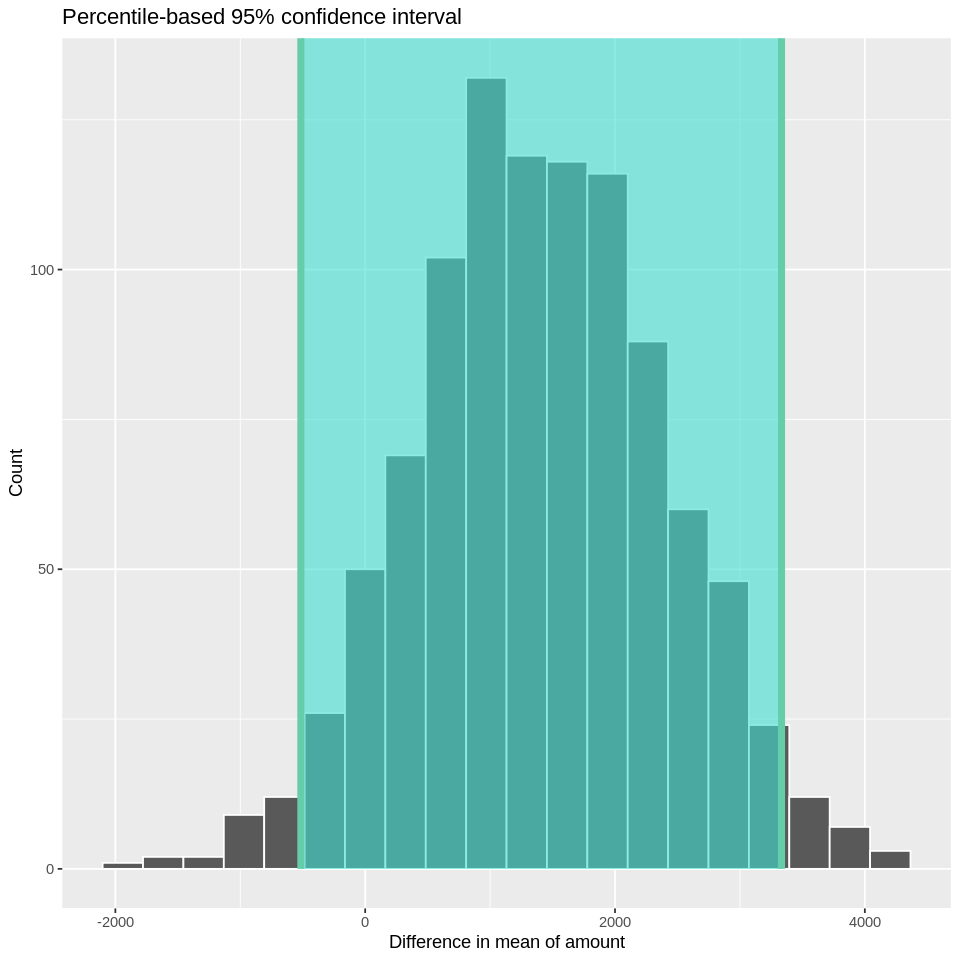

In [24]:
#Plot the bootstrapping distribution and shade the area of the data inside 95% confidence interval
options(repr.plot.width = 8, repr.plot.height = 8)
amount_ci_duration <- bootstrap_distribution%>%
                    visualize(bins = 20)+
                    shade_confidence_interval(endpoints = conf_int)+
                    labs(x = "Difference in mean of amount", y = "Count")+
                    ggtitle("Percentile-based 95% confidence interval")
amount_ci_duration


Figure 6: Simulation-Based Bootstrap Distribution

We see that 0 is contained in this confidence interval as a plausible value of $\mu_{\text{Female}} - \mu_{\text{Male}}$. This matches with our hypothesis test results of failing to reject the null hypothesis. 

#### _Conclusion: since p-value, 0.118, is larger than 0.05, we fail to reject null hypothesis. The test is insignificant at the given 5% significance level. We conclude that there is not a significant difference in the mean car purchase amount of two genders._
#### _Our confidence interval is [-514.8587, 3333.005]. Therefore, we are 95% confident that the interval [-514.8587, 3333.005] contains the difference in means of car purchase amount of females and males._

### Comparison of these two methods (bootstrap and asymptotics): 
Since the p-value of the asymptotics methods is 0.1377 and p-value of bootstrap method is 0.118, both the boostrap and asymptotics fail to reject the null hypothesis and these two values are very close to each other. Also confidence interval of asymptotics method is [-459.7655, 3318.788] and confidence interval of bootstrap method is [-514.8587, 3333.005]. These two confidence intervals are mostly overlapping. Thus we believe that there is no significant difference in the two methods.

This is because our original data is normally distributed and our sample data size is large (500). Thus we know that we've fulfilled the assumptions of Central limit theorem. Therefore, these two methods will give us similar results.

# Discussion

##### In this section, we shall interpret the results we obtained in the previous section with respect to the main question/goal of our project.


#### What did you expect to find?
We expected to find that there is a significant difference in the car purchase amount between males and females. Based on studies, there is a link between gender and car purchase amounts.

#### Summarize what you found, and the implications/impact of your findings.
We found that there is no notable difference in the mean car purchase amount for males and females. This means that there does not need to be a huge emphasis on whether a consumer is a male or female when purchasing a car since it does not differ in any significant manner. Therefore, when conducting market research, creating advertisement campaigns, etc., other attributes of consumers (e.g. salary, debt, etc.) can be focused on as opposed to whether the consumer is a male or female. This can help research and sales forecasting become more precise in the future

#### If relevant, discuss whether your results were what you expected to find.
No, this is not what we expected to find. We believed that there would in fact be a significant difference in the car purchase amount between males and females. This was due to the fact that we found literature stating (mentioned in our Introduction section) that there are differences in shopping habits between males and females. This led us to think that there would be a significant difference between the mean car purchase amounts for males and females. As we have shown, this is not correct and hence we failed to reject the null hypothesis. 

#### Discuss future questions/research this study could lead to.
This could lead to more targeted work on the attributes which might actually impact the car purchasing decisions (and perhaps, on further research, general purchasing decisions) of consumers. We have ruled out gender on the basis of our study. This can help save money and time spent on advertising to males or females separately, or further research on how to appeal to each on the basis of gender. Instead, further research can be carried out on the relationship between attributes like salary, debt, etc. and car purchase amounts. Also, one could look at the relationship between gender and other attributes, and the impact that relationship has on car purchasing amounts for consumers. Essentially, in this manner, the research on these consumption decisions can be carried out and expanded.  

#### What is your point estimate?
Our point estimate is the mean of the car purchase amount of each gender.

#### How did you quantify the errors of your estimates?
The errors of our estimate can be quantified by the standard error, which is standard deviation / sqrt(n).

#### What are the potential challenges/drawbacks?
We did not consider many other factors like area, salary, debt... so further research might be needed for a more complete report, since these are also factors that affect the decisions made by consumers for car purchase decisions. 
We would also caution though that there could be a possibility of Type II error since we failed to reject the null hypothesis. 

#### How did you make sure your analysis is reproducible?
We set the same seed for each random sample we took such as bootstrapping.

# Reference

Dataset: Yashpal. (2022, September 30). Ann - car sales price prediction. Kaggle. Retrieved November 6, 2022, from https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction 

Corkran, C., &amp; Writer, C. (2012, August 15). Study shows men spend more time and money car shopping than women. Digital Dealer. Retrieved November 6, 2022, from https://digitaldealer.com/dealer-gm/study-shows-men-spend-more-time-and-money-car-shopping-than-women/#:~:text=The%20CarGurus%20study%2C%20which%20examined,%2415%2C485%20for%20female%20shoppers). 

The Boston Globe. (2012, August 27). Differences in how men and women car shop. Boston.com. Retrieved November 6, 2022, from https://www.boston.com/cars/news-and-reviews/2012/08/27/differences-in-how-men-and-women-car-shop/ 